In [1]:
from gekko import GEKKO
import numpy as np


m = GEKKO()
m.time = np.linspace(0,1,101)
u = m.MV(value=.75) #mv is what you use as a DOF for optimization problem. 
u.STATUS = 1
x1 = m.Var(value=1)
x2 = m.Var(value=0)

m.Equation(x1.dt() >= u)
m.Equation(x2.dt() == x1**2 + u**2)

#multiply all x2 trajectory by zero excepto for last one. 
p = np.zeros(101)
p[-1] = 1
final = m.Param(p)

m.Minimize(x2*final)

m.options.IMODE = 6

m.solve()



apm 10.37.153.39_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            5
   Intermediates:            0
   Connections  :            0
   Equations    :            3
   Residuals    :            3
 
 Number of state variables:           1000
 Number of total equations: -          800
 Number of slack variables: -          100
 ---------------------------------------
 Degrees of freedom       :            100
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ipopt

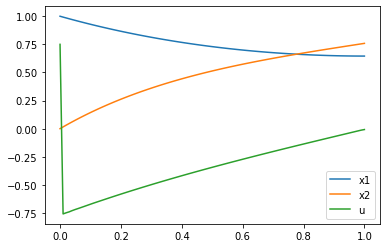

In [2]:
import matplotlib.pyplot as plt
plt.plot(m.time, x1, label='x1')
plt.plot(m.time, x2, label='x2')
plt.plot(m.time, u, label='u')
plt.legend()
plt.show()

# LUUS Optimization

In [7]:
m = GEKKO(remote=False)
m.time = np.linspace(0,2,11)

x1 = m.Var(value = 1)
u = m.MV(lb=-1, ub=1)
m.Equation(x1.dt() == u)
u.STATUS = 1

p = np.zeros(11)
m.options.DIAGLEVEL = 2
p[-1] = 1
final = m.Param(p)
#only total integral at last time step
m.Minimize(m.integral(x1**2) * final)
m.options.IMODE = 6
m.solve()
m.open_folder()

 ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 Called files( 55 )
 File copy failed: overrides.dbs does not exist
 files: overrides.dbs does not exist
 ARGUMENT  1 : gk_model3
 ARGUMENT  2 : 
 
 Run id   : 2022y01m31d10h44m44.082s
 
 COMMAND LINE ARGUMENTS
 coldstart:  0
 imode    :  6
 dbs_read :  T
 dbs_write:  T
 specs    :  T
 
 ctl selected
 Called files( 35 )
 READ info FILE FOR VARIABLE DEFINITION: gk_model3.info
 initialization step:  0
 Parsing model file gk_model3.apm
 Read model file (sec): 0.008
 Initialize constants (sec): 0.
 Determine model size (sec): 0.
 Allocate memory (sec): 0.
 Parse and store model (sec): 0.
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :  0
   Constants    :  0
   Variables    :  4
   Intermediates:  0
   Connections  :  0
   Equations    :  3
   Residuals    :  3
 
 Err

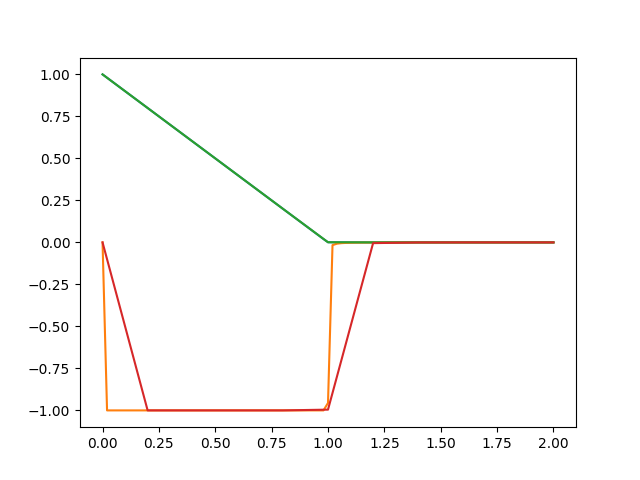

In [8]:
plt.plot(m.time, x1)
plt.plot(m.time, u)
plt.show()

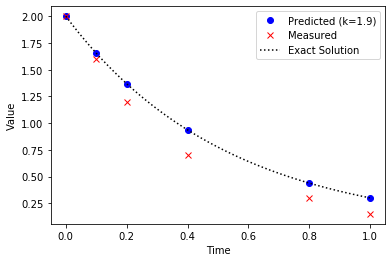

In [4]:
from gekko import GEKKO

t_data = [0, 0.1, 0.2, 0.4, 0.8, 1]
x_data = [2.0,  1.6,  1.2, 0.7,  0.3,  0.15]

m = GEKKO(remote=False)
m.time = t_data
x = m.CV(value=x_data); x.FSTATUS = 1  # fit to measurement
k = m.FV(); k.STATUS = 1               # adjustable parameter
m.Equation(x.dt()== -k * x)            # differential equation

m.options.IMODE = 5   # dynamic estimation
m.options.NODES = 5   # collocation nodes
m.solve(disp=False)   # display solver output
k = k.value[0]

import numpy as np
import matplotlib.pyplot as plt  # plot solution
plt.plot(m.time,x.value,'bo',\
         label='Predicted (k='+str(np.round(k,2))+')')
plt.plot(m.time,x_data,'rx',label='Measured')
# plot exact solution
t = np.linspace(0,1); xe = 2*np.exp(-k*t)
plt.plot(t,xe,'k:',label='Exact Solution')
plt.legend()
plt.xlabel('Time'), plt.ylabel('Value')
plt.show()